**Homework 1**
Name: Woh Jing Ru
Matric Number: A0158289L


Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import scipy.stats as st
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**a. Graph the total Population vs Year**

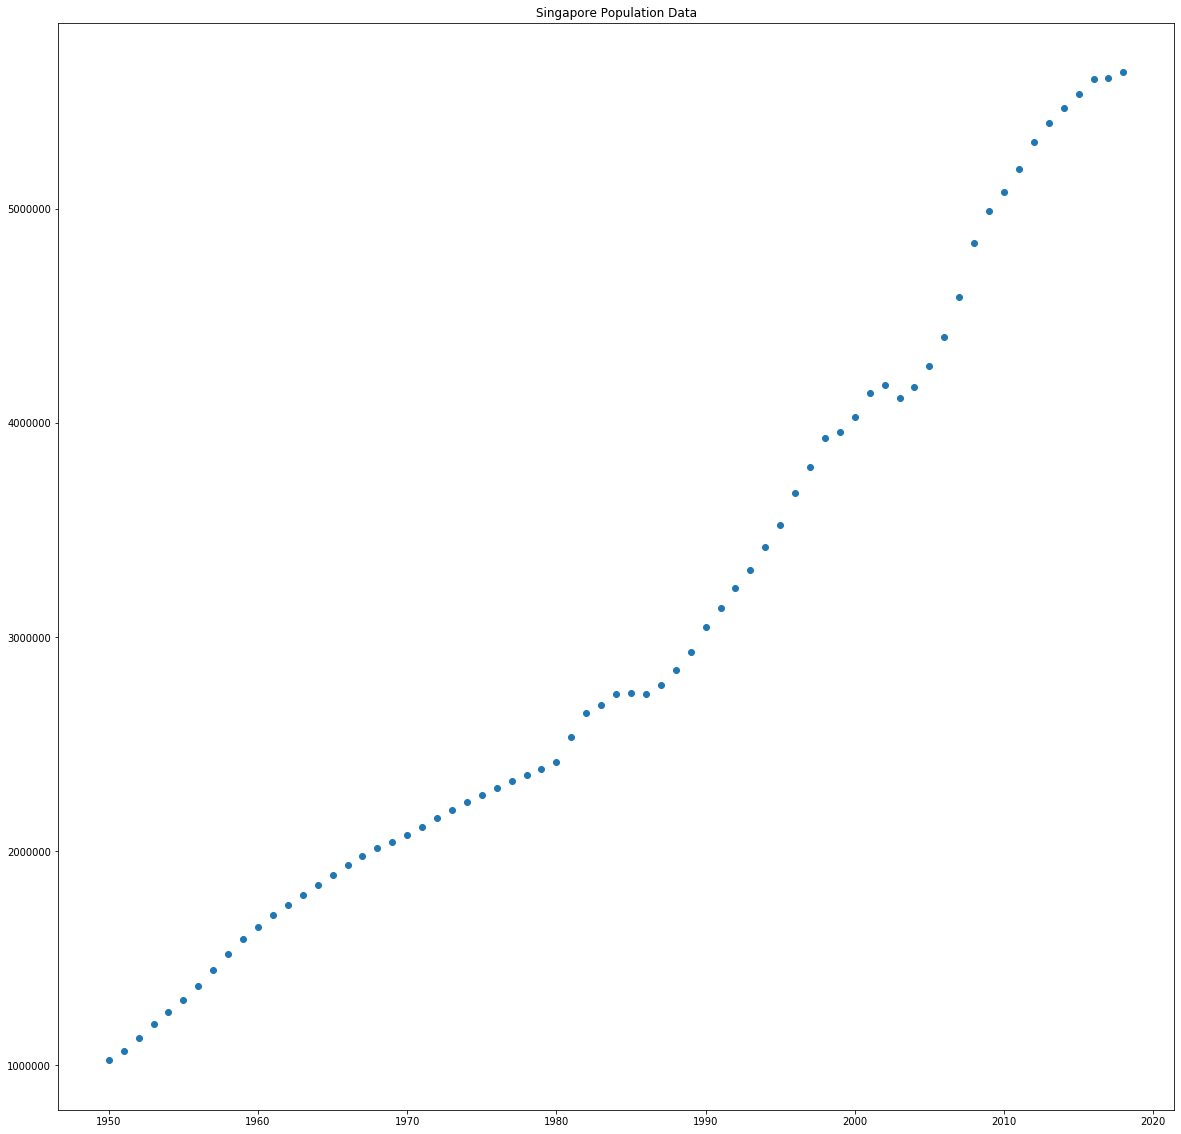

In [2]:
df = pd.read_csv('data.csv', thousands=',')

df.rename(columns={'Variables':'Year'}, 
                 inplace=True)
 
x = df['Year'].values.reshape(-1,1)
y = df['Population'].values.reshape(-1,1)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(title='Singapore Population Data')
ax1.plot(x,y,'o')


**b. Use linear regression to build an estimator of the population of Singapore in the future. Use the data for years 2013 and earlier as training data.**

In [3]:
#Split data into training and testing set

x_train = x[:-5]
x_test = x[-5:]

y_train = y[:-5]
y_test = y[-5:]


In [4]:
# Create Linear Regression Model
lr = lm.LinearRegression()

# Fit dataset into training model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**C. What are the slope and y-intercept of the best fit line? What is the mean squared error of the estimator on the training data?**

In [5]:

#To retrieve the intercept:
print('y-intercept:', (lr.intercept_[0]))

#To retrieve the slope:
print('slope:', lr.coef_[0][0])


#To retrieve the MSE for training data:
y_pred=lr.predict(x_train)
linear_train_metric=metrics.mean_squared_error(y_pred, y_train)
print('Mean Squared Error:', linear_train_metric)

y-intercept: -122692970.62939563
slope: 63343.22625915753
Mean Squared Error: 55496493545.957756


**d. Use years>2013 as test data and predict the data for those five years.What is the mean squared error of the estimator on the test data?**

   Year     Predicted   Actual
0  2014  4.880287e+06  5469724
1  2015  4.943630e+06  5535002
2  2016  5.006974e+06  5607283
3  2017  5.070317e+06  5612253
4  2018  5.133660e+06  5638676
Mean Squared Error: 321252803426.99133


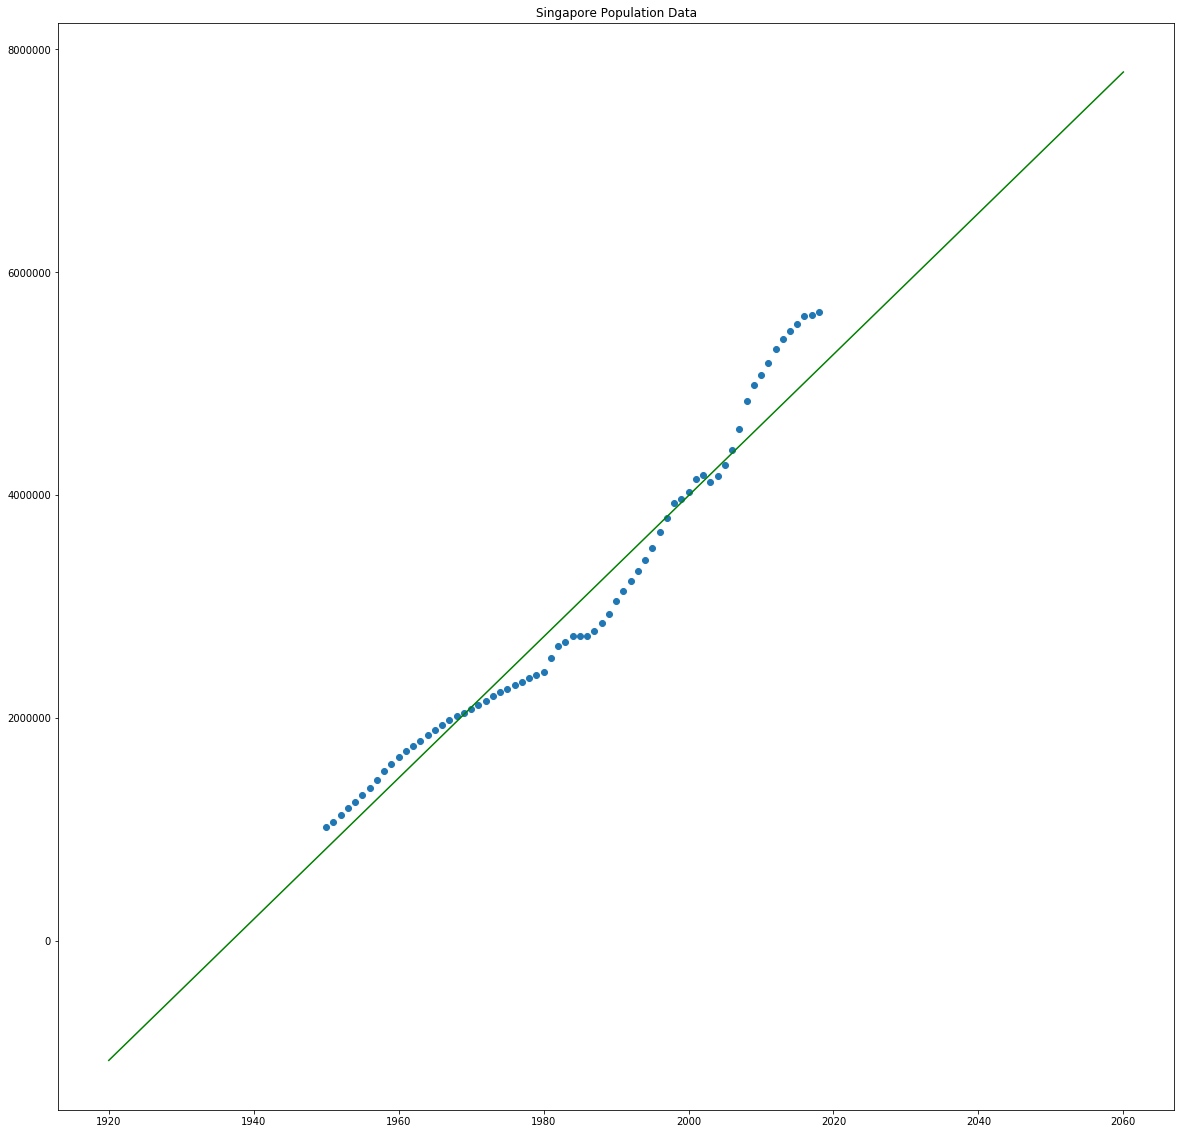

In [6]:
#Plot the predicted line
x_lr = np.linspace(1920, 2060, 14).reshape(-1,1)
y_lr = lr.predict(x_lr)

#plot model and original data in one graph for visualisation
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(title='Singapore Population Data')

ax1.plot(x,y,'o')
ax1.plot(x_lr,y_lr,'g')


#get predicted values from 2014-2018
pred = lr.predict(x_test)
table1 = pd.DataFrame({'Year': x_test.flatten(), 'Predicted': pred.flatten(), 'Actual': y_test.flatten()})
print (table1)

#save metric
linear_test_metric= metrics.mean_squared_error(pred, y_test)

#To retrieve the MSE of test data:
print('Mean Squared Error:', linear_test_metric)


**e. What is your estimate of Singapore’s population in 2030 and 2050? Do you think these estimates are reasonable?**

In [8]:
#prediction for 2030 and 2050

new_x = np.array([2030,2050]).reshape (-1,1)
new_lr= lr.predict(new_x)
table2 = pd.DataFrame({'Year': new_x.flatten(), 'Predicted': new_lr.flatten()})
table2

,Year,Predicted
0,2030,5.893779e+06
1,2050,7.160643e+06


These estimates might not be reasonable as the MSE values for the test data is rather high. Also, it is not reasonable as our population does not follow a linear model. Factors like birth/death rates, immigration rates and mortality rates all affects the population and these rates usually do not follow a linear model. A more feasible model might be logistic growth model, in which the population will eventually level off towards its maximum capacity, which Singapore is getting closer to in the recent years. Hence, it is very unlikely that the population in 2030 and 2050 will follow a linear increase.

**f. How could you improve your estimates for the future population of Singapore?**

One improvement implemented below is to choose a different set of training and testing data. This ensure that our model has lower varaince on unseen data, reducing its overfit.

In [20]:
#Try changing train and test set

from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
y_train = np.asarray(y_train)
y_test =np.asarray(y_test)
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)
pred2 =lr.predict(X_train)

linear_train_metric1= metrics.mean_squared_error(pred2, y_train)
linear_test_metric1= metrics.mean_squared_error(pred1, y_test)


metrics1 = [['train:',linear_train_metric, linear_train_metric1], ['test:',linear_test_metric,linear_test_metric1]]
table4= pd.DataFrame(metrics1, columns = [' ','Original', 'Shuffled']) 
table4

,,Original,Shuffled
0,train:,5.549649e+10,5.871190e+10
1,test:,3.212528e+11,1.165625e+11


As we can see from the table above, a different set of training and testing data is chosen. This ensure we chose a shuffled set of data for training, rather than all from 1950 to 2013. This helped to decrease the MSE on the test data, which means the model predcits better for unseen data now. It is possible to extend this task to produce a set of model from different training and testing sets, then calculate the average from the set of models to obtain an optimised model.